In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
airpas = pd.read_csv(r"C:\Users\ganes\Dropbox\PC\Downloads\AirPassengers.csv")

In [7]:
print(airpas)
pd.options.display.max_rows = 9999


       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
5    1949-06         135
6    1949-07         148
7    1949-08         148
8    1949-09         136
9    1949-10         119
10   1949-11         104
11   1949-12         118
12   1950-01         115
13   1950-02         126
14   1950-03         141
15   1950-04         135
16   1950-05         125
17   1950-06         149
18   1950-07         170
19   1950-08         170
20   1950-09         158
21   1950-10         133
22   1950-11         114
23   1950-12         140
24   1951-01         145
25   1951-02         150
26   1951-03         178
27   1951-04         163
28   1951-05         172
29   1951-06         178
30   1951-07         199
31   1951-08         199
32   1951-09         184
33   1951-10         162
34   1951-11         146
35   1951-12         166
36   1952-01         171
37   1952-02         180
38   1952-03         193


In [4]:
airpas

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
airpas.columns

Index(['Month', 'Passengers'], dtype='object')

In [7]:
airpas.Month = pd.to_datetime(airpas.Month , infer_datetime_format= True)

In [8]:
airpas = airpas.set_index(['Month'])

In [9]:
airpas

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
airpas.columns   # Now Month is an index col

Index(['Passengers'], dtype='object')

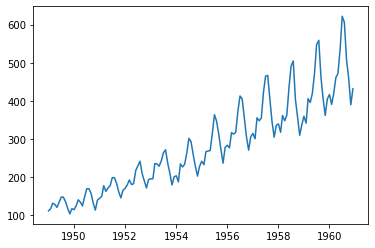

In [11]:
plt.plot(airpas)

In [12]:
# It is not stationary : Mean and Varience both changes 

In [13]:
# Data is in uptrend and Seasonal On monthly basis

In [14]:
airpas.diff()   # first level of differencing

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


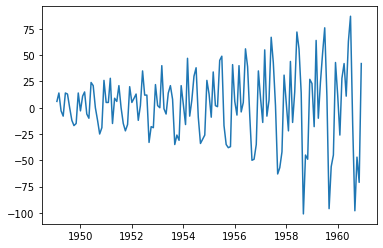

In [15]:
plt.plot(airpas.diff());

In [16]:
# This is also not stationary

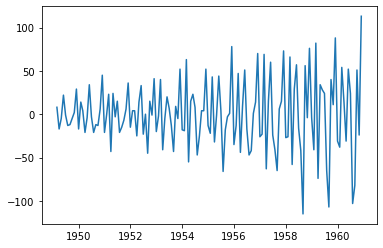

In [17]:
plt.plot(airpas.diff().diff());
# Second level of differencing

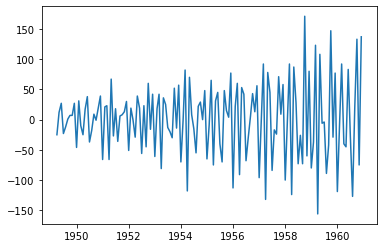

In [18]:
plt.plot(airpas.diff().diff().diff())  # Third level of differencing

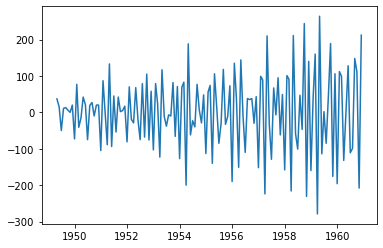

In [19]:
plt.plot(airpas.diff().diff().diff().diff());  # Forth level of differencing

In [20]:
log_airpas = np.log(airpas)

#  this is the base series now 

# so predictions would be done in logs so we  need to take anti log to get 
# answers in actual units 

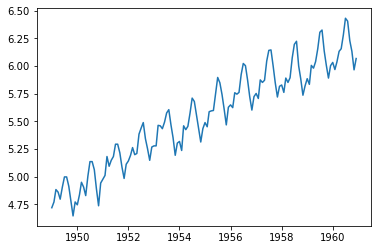

In [21]:
plt.plot(log_airpas);

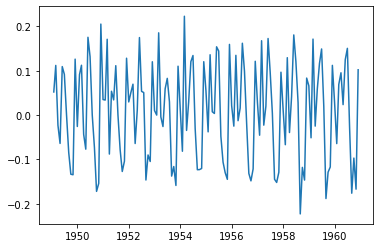

In [22]:
plt.plot(log_airpas.diff());

In [23]:
# this seems as stationary

In [24]:
# After taking the log my base series is 'log_airpas' And 
# log_airpas is used to build the model , 
# so after doing the prediction we need to take Anti-log

In [25]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

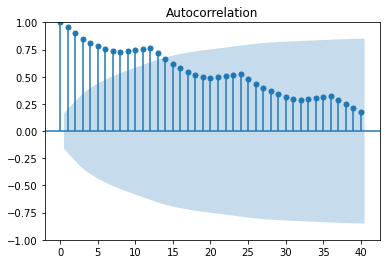

In [26]:
plot_acf(log_airpas.Passengers, lags = 40);

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


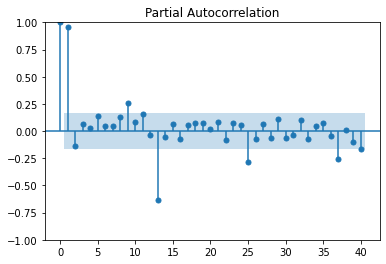

In [27]:
plot_pacf(log_airpas.Passengers, lags = 40);

In [28]:
# If ACF declines sharply but PACF decays slowly 
# then we conclude that its MA(q) Process a

In [29]:
# If PACF declines sharply but ACF decays slowly 
# then we conclude that its AR(p) Process

In [30]:
#  we got the value of P, D, Q   nwo lets build the model

In [31]:
from statsmodels.tsa.arima_model  import ARIMA

In [32]:
#log_airpas

In [33]:
#  SARIMA  model 

In [34]:
# ARIMA model   can not handle seasonality thats why we use SARIMA 

# how to use SARIMA    --->  1st we use auto arima which will gives the value of P,D, Q
# pass these values in SARIMA 

In [35]:
# building the model using AUTO ARIMA and SARIMA

In [36]:
import pmdarima

from pmdarima import  auto_arima

In [ ]:
auto_arima(log_airpas , seasonal= True  , m = 12)

In [ ]:
# what is the seasonal period of this data ???

#  12 months 

In [ ]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [ ]:
model_sarima = SARIMAX(log_airpas , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

# object 

In [ ]:
results = model_sarima.fit() 
# model created over here 

In [ ]:
pred = results.predict(start= 144 ,  end = 155)
# predition for next one year 

In [ ]:
pred_after_anti_log = np.round(np.exp(pred))
# these are the Actual prediction for the next one year 

In [ ]:
# consider ANTRISK has build a model and is presenting to the customer(Siddesh and Sanket)

# HOW can we trust these values at some percentage of error  ---- ????

#  we can do some kind of sequential sampling 
#  and also  put a graph to give  confidence 


In [ ]:
plt.figure( figsize=  ( 8 , 8)) , 
plt.plot(airpas   ,                color = 'r'   , marker = '*' , label = 'actual 1949-1960')
plt.plot(pred_after_anti_log  ,    color = 'b'   , marker = '*' , label = 'Pred-1961')
plt.legend();

#year on year its in uptrend and with a year its seasonal

# lets build the model after doing the sampling

In [ ]:
train   = log_airpas.iloc[ 0 :132 , ]   #  1st 11 years in train
test    = log_airpas.iloc[132:144 , ]   #  last 1 year in test

In [ ]:
auto_arima(log_airpas , seasonal= True  , m = 12)

In [ ]:
model_sarima = SARIMAX(train , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

In [ ]:
results1 = model_sarima.fit()

In [ ]:
pred_after_anti_log_1960 =round(np.exp(results1.predict(start = 132 , end = 143)))

In [ ]:
# now comapre the predicted values with actual and let me know your conclusion ?

#  compare the actual and predicted ( month wise )??

In [ ]:
plt.figure( figsize=  ( 10 , 10)) , 
plt.plot(airpas   ,                     color = 'r'   , marker = '*' , label = 'actual 1949-1960')
plt.plot(pred_after_anti_log_1960  ,    color = 'b'   , marker = '*' , label = 'Pred-1961')
plt.legend();

In [ ]:
plt.figure( figsize=  ( 10 , 10)) 
plt.plot(airpas.iloc[132:144]   ,       color = 'r'   , marker = '*' , label = 'actual 1960')
plt.plot(pred_after_anti_log_1960  ,    color = 'b'   , marker = '*' , label = 'Pred-1960')
plt.legend();

In [ ]:
pred_actual = pd.DataFrame()

pred_actual['Predicted']  =    pred_after_anti_log_1960
pred_actual['Actual']     =    np.exp(test)

pred_actual['Error']      =    pred_actual['Actual']  - pred_actual['Predicted']

pred_actual['Per_error']  =    np.round(pred_actual.Error  * 100/ pred_actual.Actual)

pred_actual

In [ ]:
MSE = np.mean(np.square(pred_actual.Error))
MSE

In [ ]:
MAPE = np.mean(np.abs(pred_actual.Per_error))
MAPE

# # RESTAURANT VISITORS

In [222]:
rv = pd.read_csv(r"E:\movie\pandas data set\RestaurantVisitors.csv", index_col = 'date', parse_dates = True)

In [223]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [224]:
rv.shape

(517, 8)

In [225]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [226]:
rv = rv.dropna()

In [227]:
rv.shape

(478, 8)

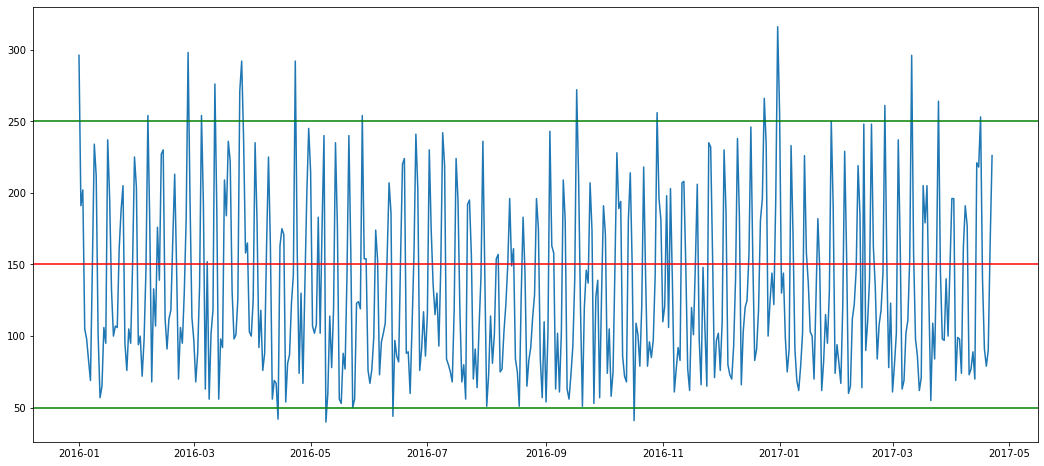

In [228]:
plt.figure(figsize = (18,8))
plt.plot(rv.total)
plt.axhline(y = 150, color = 'r')
plt.axhline(y = 250, color = 'g')
plt.axhline(y = 50, color = 'g');

In [229]:
#    seasonal      ? ---> (   its seasonal with a time period of a week  7 days     )
#    trends        ? ---> (   no trend    )
#    stationarity  ? ---> (   almost stationary    )  

In [230]:
ho_index =  rv[rv.holiday  == 1].index 
ho_index  # all the dates when holiday is occuring

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

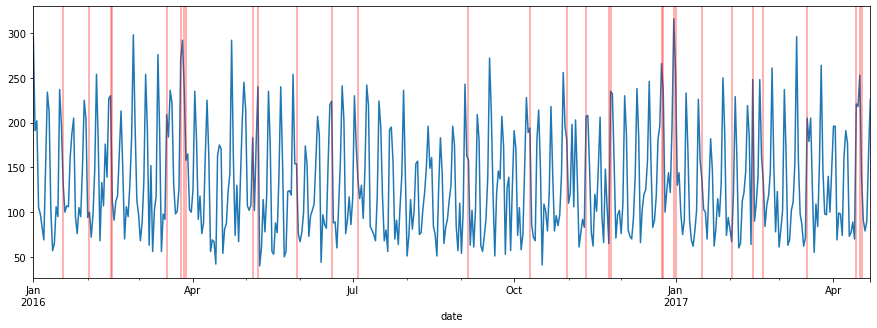

In [231]:
ax = rv['total'].plot(figsize = (15,5))
for day in ho_index:
   ax.axvline(x = day, color = 'red', alpha = .4)
# this graph is to show that holiday is impacting the number of ppl visting rest normaly with holiday 
# so there is a sudden increase 

# so SARIMA model may not be sufficent and SARIMAX model has to be used

In [232]:
import pmdarima

from pmdarima import  auto_arima

In [233]:
auto_arima(rv['total'], seasonal = True, m = 7, )
#  auto_arima tries many diff comininations of P,D,Q and gives us the best combintaion values


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [234]:
##do  the sampling
rv.shape

(478, 8)

In [235]:
rv_train = rv.iloc[0:450]
rv_test  = rv.iloc[450::]

In [236]:
model_sarima_rv = SARIMAX(rv_train['total'], order=(1,0,0), seasonal_order = (1,0,1,7))

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [237]:
results_rv = model_sarima_rv.fit()

In [238]:
pred_rv_sarima = results_rv.predict(start = 450, end = 477)

In [239]:
pred_rv_sarima

2017-03-26    180.789886
2017-03-27     91.785341
2017-03-28     95.815775
2017-03-29     95.446062
2017-03-30     96.922397
2017-03-31    145.252856
2017-04-01    232.336644
2017-04-02    174.631036
2017-04-03     90.584861
2017-04-04     95.576421
2017-04-05     95.393434
2017-04-06     96.905905
2017-04-07    145.239536
2017-04-08    232.317723
2017-04-09    174.616997
2017-04-10     90.577600
2017-04-11     95.568770
2017-04-12     95.385800
2017-04-13     96.898150
2017-04-14    145.227913
2017-04-15    232.299132
2017-04-16    174.603024
2017-04-17     90.570352
2017-04-18     95.561123
2017-04-19     95.378167
2017-04-20     96.890396
2017-04-21    145.216292
2017-04-22    232.280543
Freq: D, Name: predicted_mean, dtype: float64

In [240]:
pred_actul_rv = pd.DataFrame()

In [241]:
pred_actul_rv['Actual']  = rv_test.total
pred_actul_rv['Pred']  = pred_rv_sarima

pred_actul_rv['Error']  =   pred_actul_rv['Actual'] -pred_actul_rv['Pred']

pred_actul_rv['Error_per']    = np.abs(pred_actul_rv['Error'] * 100 )/  pred_actul_rv['Actual'] 

In [242]:
pred_actul_rv

,Actual,Pred,Error,Error_per
date,,,,
2017-03-26,146.0,180.789886,-34.789886,23.828689
2017-03-27,98.0,91.785341,6.214659,6.341489
2017-03-28,97.0,95.815775,1.184225,1.220850
2017-03-29,140.0,95.446062,44.553938,31.824242
2017-03-30,100.0,96.922397,3.077603,3.077603
2017-03-31,149.0,145.252856,3.747144,2.514862
2017-04-01,196.0,232.336644,-36.336644,18.539104
2017-04-02,196.0,174.631036,21.368964,10.902533
2017-04-03,69.0,90.584861,-21.584861,31.282407


In [243]:
#  mape at   ,order=(0, 0, 0)  ,seasonal_order=(1, 0, 1, 7)

mape1 = np.mean(np.abs(pred_actul_rv['Error_per'] ))
mape1

16.03684646590064

In [244]:
MSE1 = np.mean(np.square(pred_actul_rv['Error'] ))
MSE1  #  884  without sarimax only with sarima 

884.2655543609424

In [245]:
pred_actul_rv[pred_actul_rv.Error_per  > 10]

,Actual,Pred,Error,Error_per
date,,,,
2017-03-26,146.0,180.789886,-34.789886,23.828689
2017-03-29,140.0,95.446062,44.553938,31.824242
2017-04-01,196.0,232.336644,-36.336644,18.539104
2017-04-02,196.0,174.631036,21.368964,10.902533
2017-04-03,69.0,90.584861,-21.584861,31.282407
2017-04-06,74.0,96.905905,-22.905905,30.953926
2017-04-07,162.0,145.239536,16.760464,10.345966
2017-04-08,191.0,232.317723,-41.317723,21.632316
2017-04-10,73.0,90.577600,-17.577600,24.078904


In [246]:
# model is not doing good for holidays  its doing under prediction for holidays 
# so SARIMAX model is needed to handle holidays 

In [247]:
model2 = SARIMAX(rv_train['total'], order = (1,0,0), seasonal_order  = (1,0,1,7), exog = rv_train[['holiday']])

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [248]:
results2 = model2.fit()

In [249]:
pred_rv2 = np.round(results2.predict(start = 450  , end = 477 , exog = rv_test[['holiday' ]]))

In [250]:
pred_actual_rv2 = pd.DataFrame()

In [251]:
pred_actual_rv2['Actual']= rv_test.total
pred_actual_rv2['Pred'] = pred_rv2
pred_actual_rv2['Error'] = pred_actual_rv2['Actual'] - pred_actual_rv2['Pred'] 
pred_actual_rv2['per error'] = np.abs(np.mean(pred_actual_rv2['Error']*100))

In [252]:
pred_actual_rv2

,Actual,Pred,Error,per error
date,,,,
2017-03-26,146.0,176.0,-30.0,71.428571
2017-03-27,98.0,82.0,16.0,71.428571
2017-03-28,97.0,93.0,4.0,71.428571
2017-03-29,140.0,95.0,45.0,71.428571
2017-03-30,100.0,92.0,8.0,71.428571
2017-03-31,149.0,139.0,10.0,71.428571
2017-04-01,196.0,229.0,-33.0,71.428571
2017-04-02,196.0,169.0,27.0,71.428571
2017-04-03,69.0,80.0,-11.0,71.428571


In [253]:
mse2 = np.mean(np.square(pred_actual_rv2['Error']))

In [254]:
mse2

359.85714285714283

In [255]:

from statsmodels.tsa.seasonal import seasonal_decompose

In [256]:
rv_seasonal  =  seasonal_decompose(rv.total)

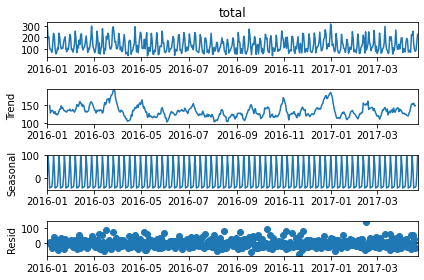

In [257]:
rv_seasonal.plot() ;

# statical test for stationarity

In [258]:
#  adfuller  test   for stationarity ( answers is p values )

# in adf test Ho is fixed ( that times series is NOT stationary)
#             Ha is fixed (that times series is    stationary)

In [259]:
from statsmodels.tsa.stattools  import adfuller

In [260]:
##airpas data
airpas = airpas = pd.read_csv(r"C:\Users\ganes\Dropbox\PC\Downloads\AirPassengers.csv")
airpas.Month = pd.to_datetime(airpas.Month , infer_datetime_format= True)
airpas = airpas.set_index(['Month'])

In [261]:
adfuller(airpas)
##pvalue
## if p_value is less than 0.05 always reject the null

(0.8153688792060411,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [262]:
##lets automate the conclusion

In [263]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    p_value = adfuller(series)[1]
    if p_value < .05:
        print("p_value is ----->", p_value)
        print("REject the null hypothesis")
        print("Series is STATIONARY")
    else:
        print("P_value is ---->", p_value)
        print("Fail to reject the null hypothesis")
        print("Series is not Stationary")

In [264]:
adf_test_normality(airpas)

P_value is ----> 0.9918802434376409
Fail to reject the null hypothesis
Series is not Stationary


# KPSS  test   ( is to check if series is stationary)

In [265]:
# Ho and Ha are fixed 
# Ho  that times series is  stationary
# Ha  that times series is NOT  stationary

In [266]:
from statsmodels.tsa.stattools import kpss

In [267]:
kpss(airpas)

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.6513122354165206,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [268]:
kpss(rv.total)

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.20595582170555526,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [269]:
def kpss_normality( series):
    from statsmodels.tsa.stattools import kpss
    p_value = kpss(series)[1]
    if p_value <.05 :
        print("P_value is --> " , p_value)
        print("Reject the null hypothesis")
        print("Series is  NOT STATIONARY")
    else   : 
        print("P_value is --> " , p_value)
        print(" fail to Reject the null hypothesis")
        print("Series is  STATIONARY")

In [270]:
kpss_normality(airpas)

P_value is -->  0.01
Reject the null hypothesis
Series is  NOT STATIONARY


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [271]:
kpss_normality(rv.total)

P_value is -->  0.1
 fail to Reject the null hypothesis
Series is  STATIONARY


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
al = pd.read_csv(r"C:\Users\ganes\Dropbox\PC\Downloads\Alcohol_Sales.csv")

In [63]:
al

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
5,1992-06-01,4529
6,1992-07-01,4466
7,1992-08-01,4137
8,1992-09-01,4126
9,1992-10-01,4259


In [64]:
al.columns

Index(['DATE', 'S4248SM144NCEN'], dtype='object')

In [65]:
al.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [66]:
al.rename(columns={'S4248SM144NCEN': 'sales'}, inplace = True)

In [67]:
al.columns

Index(['DATE', 'sales'], dtype='object')

In [68]:
al

,DATE,sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
5,1992-06-01,4529
6,1992-07-01,4466
7,1992-08-01,4137
8,1992-09-01,4126
9,1992-10-01,4259


In [69]:
##aim is to do forecasted for next 11 month i.e 2020

In [70]:
al.DATE = pd.to_datetime(al.DATE , infer_datetime_format= True)

In [71]:
al = al.set_index(['DATE'])

In [72]:
al

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
1992-06-01,4529
1992-07-01,4466
1992-08-01,4137
1992-09-01,4126


In [73]:
al.columns

Index(['sales'], dtype='object')

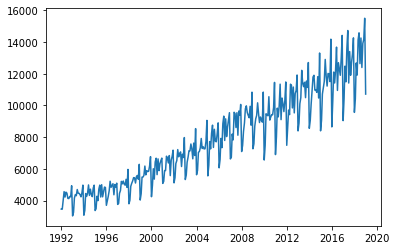

In [74]:
plt.plot(al);

In [75]:
al.diff()

,sales
DATE,
1992-01-01,NaN
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
1992-06-01,308.0
1992-07-01,-63.0
1992-08-01,-329.0
1992-09-01,-11.0


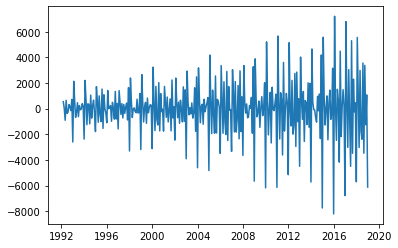

In [76]:
plt.plot(al.diff().diff());

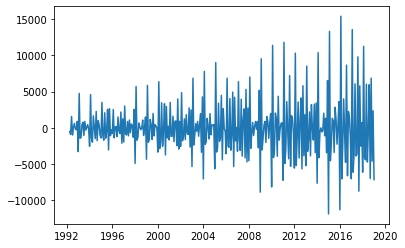

In [77]:
plt.plot(al.diff().diff().diff());

In [78]:
log_al = np.log(al)


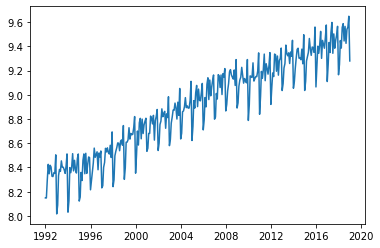

In [79]:
plt.plot(log_al);

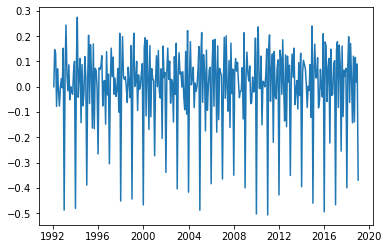

In [80]:
plt.plot(log_al.diff());

In [81]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

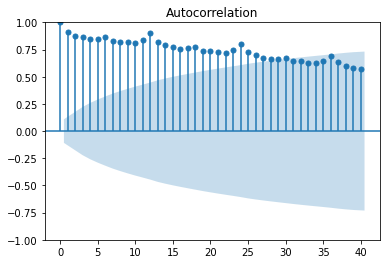

In [82]:
plot_acf(log_al.sales, lags = 40);

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


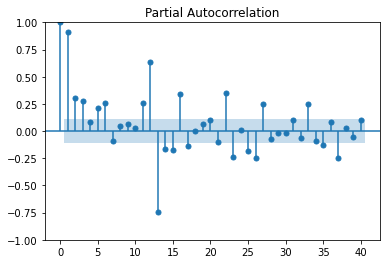

In [83]:
plot_pacf(log_al.sales, lags = 40);

In [84]:
import pmdarima

from pmdarima import  auto_arima

In [85]:
auto_arima(log_al , seasonal= True  , m = 11)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 11),
      suppress_warnings=True)

In [86]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [87]:
model_sarima1 = SARIMAX(log_al , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

# object 

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
results = model_sarima1.fit()

In [89]:
pred1 = results.predict(start = 325, end = 336)

In [90]:
pred_after_anti_log1 = np.round(np.exp(pred1))

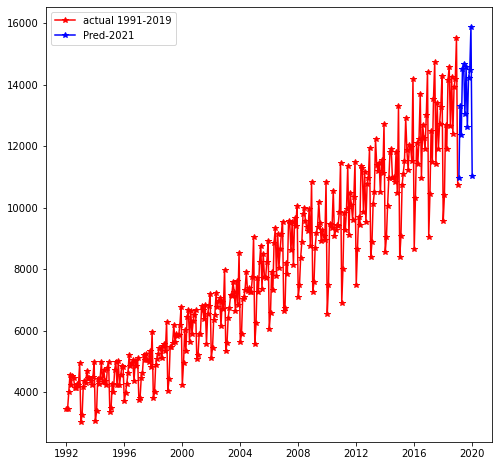

In [91]:
plt.figure( figsize=  ( 8 , 8)) , 
plt.plot(al   ,                color = 'r'   , marker = '*' , label = 'actual 1991-2019')
plt.plot(pred_after_anti_log1  ,    color = 'b'   , marker = '*' , label = 'Pred-2021')
plt.legend();

#year on year its in uptrend and with a year its seasonal

# lets build the model after doing the sampling

In [105]:
train = log_al.iloc[0:312]
test = log_al.iloc[312:325]

In [106]:
np.exp(test)

,sales
DATE,
2018-01-01,9564.0
2018-02-01,10415.0
2018-03-01,12683.0
2018-04-01,11919.0
2018-05-01,14138.0
2018-06-01,14583.0
2018-07-01,12640.0
2018-08-01,14257.0
2018-09-01,12396.0


In [107]:
auto_arima(log_al , seasonal= True  , m = 11)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 11),
      suppress_warnings=True)

In [108]:
model_sarima2 = SARIMAX(train , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
results1 = model_sarima2.fit()

In [110]:
log_al

,sales
DATE,
1992-01-01,8.148735
1992-02-01,8.148446
1992-03-01,8.294550
1992-04-01,8.425955
1992-05-01,8.347827
1992-06-01,8.418256
1992-07-01,8.404248
1992-08-01,8.327726
1992-09-01,8.325064


In [111]:
pred_after_anti_log_2019 =round(np.exp(results1.predict(start = 135 , end =336 )))

In [112]:
pred_after_anti_log_2019 

2003-04-01     6685.0
2003-05-01     7314.0
2003-06-01     6788.0
2003-07-01     7074.0
2003-08-01     7344.0
2003-09-01     6498.0
2003-10-01     7130.0
2003-11-01     6902.0
2003-12-01     8414.0
2004-01-01     5488.0
2004-02-01     5776.0
2004-03-01     6548.0
2004-04-01     6999.0
2004-05-01     7398.0
2004-06-01     7385.0
2004-07-01     7932.0
2004-08-01     7441.0
2004-09-01     6612.0
2004-10-01     7947.0
2004-11-01     6964.0
2004-12-01     8650.0
2005-01-01     5967.0
2005-02-01     6029.0
2005-03-01     7230.0
2005-04-01     7386.0
2005-05-01     7575.0
2005-06-01     8317.0
2005-07-01     7563.0
2005-08-01     7645.0
2005-09-01     7668.0
2005-10-01     7530.0
2005-11-01     8207.0
2005-12-01     9467.0
2006-01-01     5553.0
2006-02-01     6368.0
2006-03-01     8174.0
2006-04-01     7400.0
2006-05-01     8509.0
2006-06-01     9031.0
2006-07-01     7565.0
2006-08-01     9016.0
2006-09-01     8029.0
2006-10-01     8009.0
2006-11-01     8554.0
2006-12-01     9284.0
2007-01-01

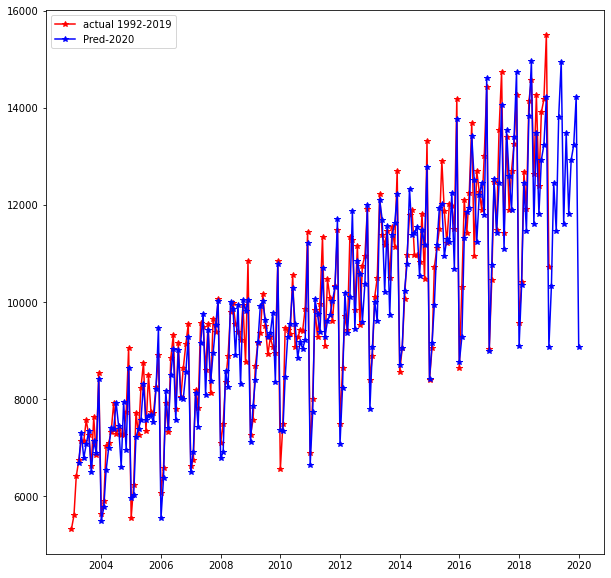

In [113]:
plt.figure( figsize=  ( 10 , 10)) , 
plt.plot(al[132:325]   ,                     color = 'r'   , marker = '*' , label = 'actual 1992-2019')
plt.plot(pred_after_anti_log_2019  ,    color = 'b'   , marker = '*' , label = 'Pred-2020')
plt.legend();

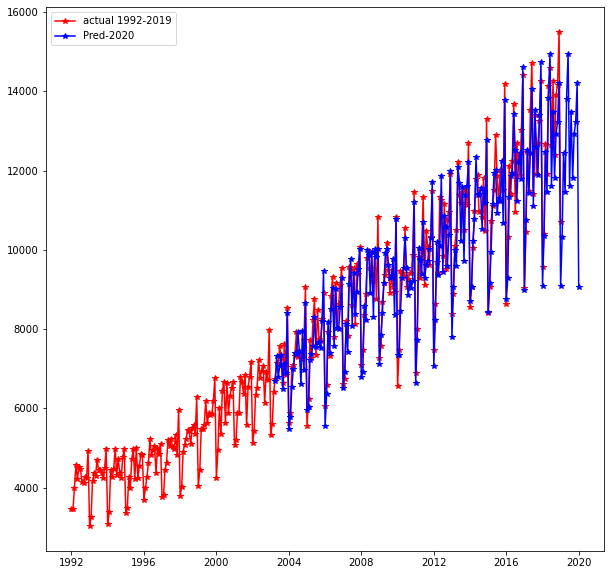

In [114]:
plt.figure( figsize=  ( 10 , 10)) 
plt.plot(al.iloc[0:325]   ,       color = 'r'   , marker = '*' , label = 'actual 1992-2019')
plt.plot(pred_after_anti_log_2019  ,    color = 'b'   , marker = '*' , label = 'Pred-2020')
plt.legend();

In [115]:
al.head(40)

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
1992-06-01,4529
1992-07-01,4466
1992-08-01,4137
1992-09-01,4126


In [116]:
pred_actual = pd.DataFrame()

pred_actual['Predicted']  =    pred_after_anti_log_2019
pred_actual['Actual']     =    np.exp(test)

pred_actual['Error']      =    pred_actual['Actual']  - pred_actual['Predicted']

pred_actual['Per_error']  =    np.round(pred_actual.Error  * 100/ pred_actual.Actual)

pred_actual

,Predicted,Actual,Error,Per_error
2003-04-01,6685.0,NaN,NaN,NaN
2003-05-01,7314.0,NaN,NaN,NaN
2003-06-01,6788.0,NaN,NaN,NaN
2003-07-01,7074.0,NaN,NaN,NaN
2003-08-01,7344.0,NaN,NaN,NaN
2003-09-01,6498.0,NaN,NaN,NaN
2003-10-01,7130.0,NaN,NaN,NaN
2003-11-01,6902.0,NaN,NaN,NaN
2003-12-01,8414.0,NaN,NaN,NaN
2004-01-01,5488.0,NaN,NaN,NaN


In [117]:
MSE = np.mean(np.square(pred_actual.Error))
MSE

683327.615384618

In [118]:
MAPE = np.mean(np.abs(pred_actual.Per_error))
MAPE

5.538461538461538

In [272]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    p_value = adfuller(series)[1]
    if p_value < .05:
        print("p_value is ----->", p_value)
        print("REject the null hypothesis")
        print("Series is STATIONARY")
    else:
        print("P_value is ---->", p_value)
        print("Fail to reject the null hypothesis")
        print("Series is not Stationary")

In [273]:
adf_test_normality(al)

P_value is ----> 0.9987196267088919
Fail to reject the null hypothesis
Series is not Stationary


In [119]:
#############################################################################################

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
wr = pd.read_csv(r"C:\Users\ganes\Dropbox\PC\Downloads\BeerWineLiquor.csv")

In [142]:
wr

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
5,6/1/1992,1775
6,7/1/1992,1912
7,8/1/1992,1862
8,9/1/1992,1770
9,10/1/1992,1882


In [143]:
wr.isnull().sum()

date    0
beer    0
dtype: int64

In [144]:
wr.columns

Index(['date', 'beer'], dtype='object')

In [145]:
wr.date = pd.to_datetime(wr.date , infer_datetime_format= True)

In [146]:
wr = wr.set_index(['date'])

In [147]:
wr

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
1992-06-01,1775
1992-07-01,1912
1992-08-01,1862
1992-09-01,1770


In [148]:
wr.columns

Index(['beer'], dtype='object')

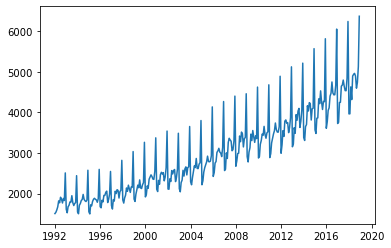

In [149]:
plt.plot(wr);

In [150]:
wr.columns   # Now Month is an index col

Index(['beer'], dtype='object')

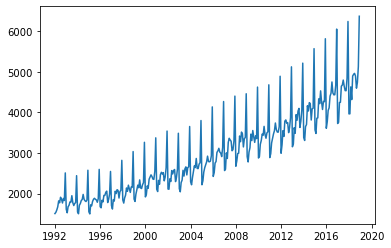

In [151]:
plt.plot(wr);

In [181]:
wr.diff().head()  # first level of differencing

,beer
date,
1992-01-01,NaN
1992-02-01,32.0
1992-03-01,56.0
1992-04-01,78.0
1992-05-01,147.0


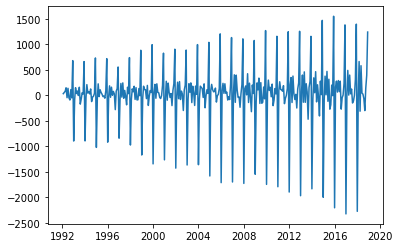

In [153]:
plt.plot(wr.diff());

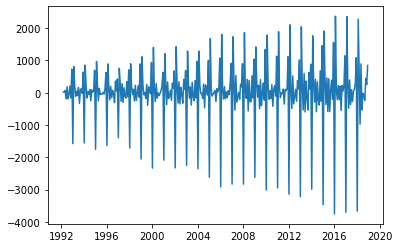

In [154]:
plt.plot(wr.diff().diff());  # Second level of differencing

In [155]:
log_wr = np.log(wr)

In [156]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

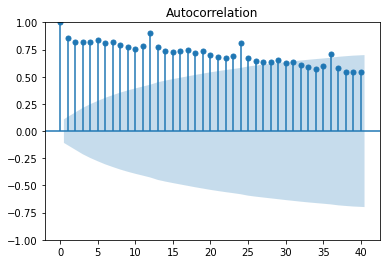

In [157]:
plot_acf(log_wr.beer, lags = 40);

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


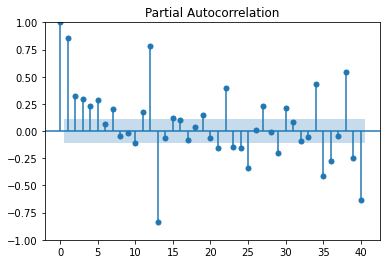

In [158]:
plot_pacf(log_wr.beer, lags = 40);

In [159]:
import pmdarima

from pmdarima import  auto_arima

In [160]:
auto_arima(log_wr , seasonal= True  , m = 12)

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [161]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [162]:
model_sarima3 = SARIMAX(log_wr , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

# object 

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [163]:
results3 = model_sarima3.fit() 


In [164]:
pred2 = results3.predict(start= 323 ,  end = 335)


In [165]:
pred_after_anti_log3 = np.round(np.exp(pred2))


In [166]:
pred_after_anti_log3

2018-12-01    6655.0
2019-01-01    4133.0
2019-02-01    4069.0
2019-03-01    4587.0
2019-04-01    4519.0
2019-05-01    4992.0
2019-06-01    4949.0
2019-07-01    5154.0
2019-08-01    5003.0
2019-09-01    4750.0
2019-10-01    4881.0
2019-11-01    5094.0
2019-12-01    6709.0
Freq: MS, Name: predicted_mean, dtype: float64

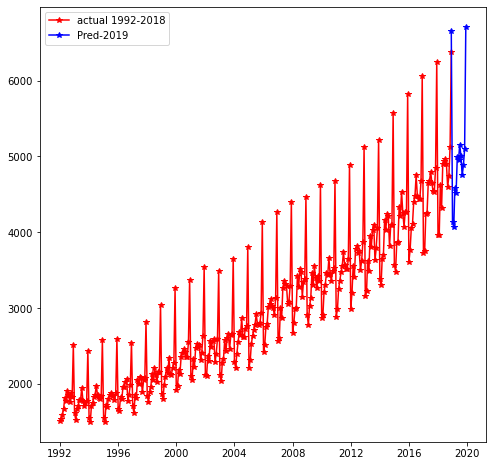

In [167]:
plt.figure( figsize=  ( 8 , 8)) , 
plt.plot(wr   ,                color = 'r'   , marker = '*' , label = 'actual 1992-2018')
plt.plot(pred_after_anti_log3  ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

#year on year its in uptrend and with a year its seasonal

In [168]:
train   = log_wr.iloc[ 0 :312 , ]   #  1st 11 years in train
test    = log_wr.iloc[312: 324, ]   #  last 1 year in test

In [169]:
np.exp(test)

,beer
date,
2018-01-01,3965.0
2018-02-01,3967.0
2018-03-01,4629.0
2018-04-01,4317.0
2018-05-01,4897.0
2018-06-01,4939.0
2018-07-01,4963.0
2018-08-01,4898.0
2018-09-01,4598.0


In [170]:
auto_arima(log_wr , seasonal= True  , m = 12)

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [171]:
model_sarima4 = SARIMAX(train , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [172]:
results3 = model_sarima4.fit()

In [173]:
pred_after_anti_log_2018 =round(np.exp(results3.predict(start = 323 , end = 335)))

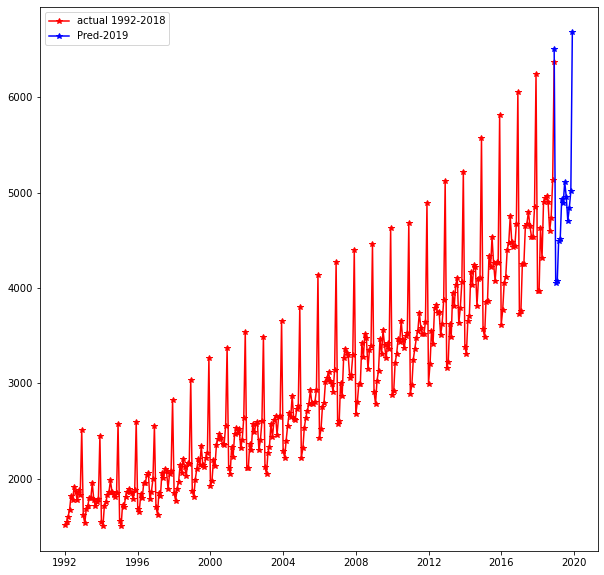

In [174]:
plt.figure( figsize=  ( 10 , 10)) , 
plt.plot(  wr ,                     color = 'r'   , marker = '*' , label = 'actual 1992-2018')
plt.plot(pred_after_anti_log_2018  ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

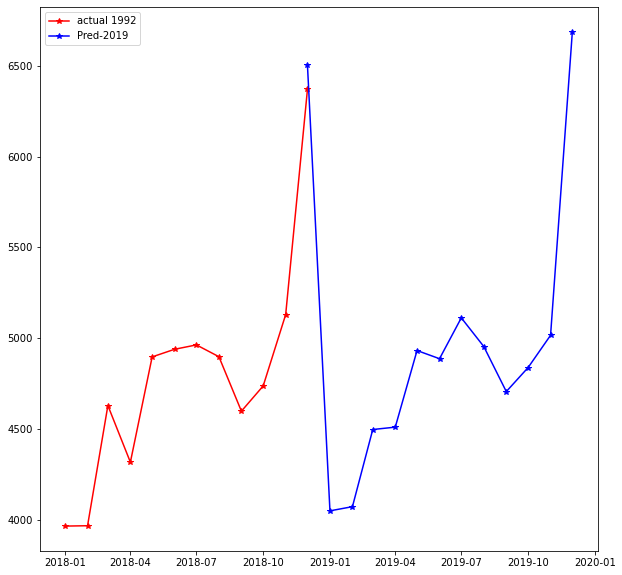

In [175]:
plt.figure( figsize=  ( 10 , 10)) 
plt.plot(wr.iloc[312:324]   ,       color = 'r'   , marker = '*' , label = 'actual 1992')
plt.plot(pred_after_anti_log_2018  ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

In [176]:
pred_actual = pd.DataFrame()

pred_actual['Predicted']  =    pred_after_anti_log_2018 
pred_actual['Actual']     =    np.exp(test)

pred_actual['Error']      =    pred_actual['Actual']  - pred_actual['Predicted']

pred_actual['Per_error']  =    np.round(pred_actual.Error  * 100/ pred_actual.Actual)

pred_actual

,Predicted,Actual,Error,Per_error
2018-12-01,6504.0,6370.0,-134.0,-2.0
2019-01-01,4049.0,NaN,NaN,NaN
2019-02-01,4072.0,NaN,NaN,NaN
2019-03-01,4497.0,NaN,NaN,NaN
2019-04-01,4510.0,NaN,NaN,NaN
2019-05-01,4932.0,NaN,NaN,NaN
2019-06-01,4887.0,NaN,NaN,NaN
2019-07-01,5112.0,NaN,NaN,NaN
2019-08-01,4954.0,NaN,NaN,NaN
2019-09-01,4706.0,NaN,NaN,NaN


In [ ]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    p_value = adfuller(series)[1]
    if p_value < .05:
        print("p_value is ----->", p_value)
        print("REject the null hypothesis")
        print("Series is STATIONARY")
    else:
        print("P_value is ---->", p_value)
        print("Fail to reject the null hypothesis")
        print("Series is not Stationary")

In [274]:
adf_test_normality(wr)

P_value is ----> 1.0
Fail to reject the null hypothesis
Series is not Stationary


In [177]:
################################################################################################

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
hp = pd.read_csv(r"C:\Users\ganes\Dropbox\PC\Downloads\HospitalityEmployees.csv")

In [185]:
hp

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7
5,6/1/1990,1123.5
6,7/1/1990,1134.2
7,8/1/1990,1137.4
8,9/1/1990,1128.8
9,10/1/1990,1106.8


In [186]:
hp.Date = pd.to_datetime(hp.Date , infer_datetime_format= True)

In [187]:
hp = hp.set_index(['Date'])

In [188]:
hp

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
1990-06-01,1123.5
1990-07-01,1134.2
1990-08-01,1137.4
1990-09-01,1128.8


In [189]:
hp.columns

Index(['Employees'], dtype='object')

In [190]:
hp.diff()

,Employees
Date,
1990-01-01,NaN
1990-02-01,10.0
1990-03-01,15.5
1990-04-01,7.4
1990-05-01,11.3
1990-06-01,14.8
1990-07-01,10.7
1990-08-01,3.2
1990-09-01,-8.6


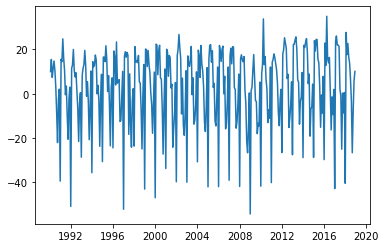

In [191]:
plt.plot(hp.diff());

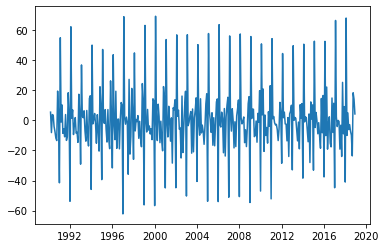

In [192]:
plt.plot(hp.diff().diff());

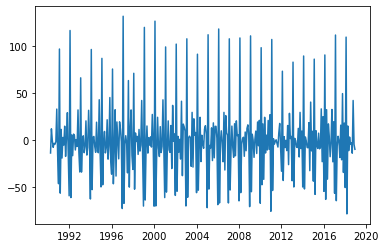

In [193]:
plt.plot(hp.diff().diff().diff());

In [194]:
log_hp = np.log(hp)

In [195]:
#log_hp

In [196]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

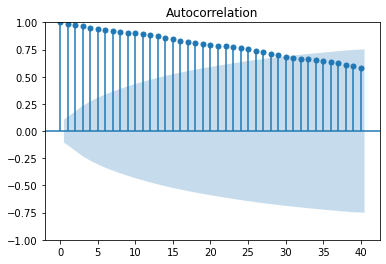

In [197]:
plot_acf(log_hp.Employees, lags = 40);

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


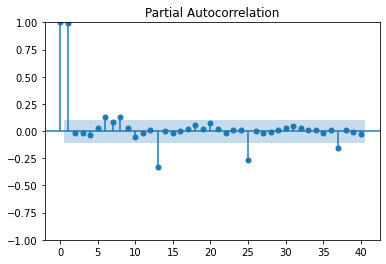

In [198]:
plot_pacf(log_hp.Employees,lags = 40);

In [199]:
import pmdarima
from pmdarima import auto_arima

In [200]:
auto_arima(log_hp , seasonal= True  , m = 12)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

In [201]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [202]:
model_sarima5 = SARIMAX(log_hp , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

# object 

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [203]:
results4 = model_sarima5.fit() 


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [204]:
pred3 = results4.predict(start= 347 ,  end = 359)


In [205]:
pred3

2018-12-01    7.596423
2019-01-01    7.579785
2019-02-01    7.592090
2019-03-01    7.601592
2019-04-01    7.613783
2019-05-01    7.623159
2019-06-01    7.630866
2019-07-01    7.633956
2019-08-01    7.633225
2019-09-01    7.621015
2019-10-01    7.617774
2019-11-01    7.615411
2019-12-01    7.617674
Freq: MS, Name: predicted_mean, dtype: float64

In [206]:
pred_after_anti_log4 = np.round(np.exp(pred3))


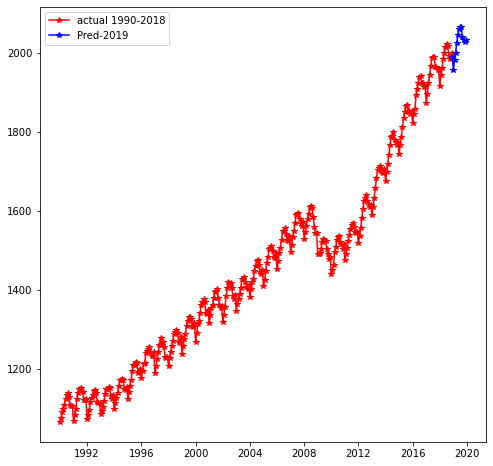

In [207]:
plt.figure( figsize=  ( 8 , 8)) , 
plt.plot(  hp ,                     color = 'r'   , marker = '*' , label = 'actual 1990-2018')
plt.plot(pred_after_anti_log4 ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

In [208]:
train   = log_hp.iloc[ 0 :335 , ]   #  1st 11 years in train
test    = log_hp.iloc[335: 348, ]   #  last 1 year in test

In [209]:
np.exp(test)

,Employees
Date,
2017-12-01,1957.2
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5
2018-06-01,2015.3
2018-07-01,2022.1
2018-08-01,2019.1


In [210]:
auto_arima(log_hp , seasonal= True  , m = 12)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

In [211]:
model_sarima5 = SARIMAX(train , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [212]:
results5 = model_sarima5.fit()

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [213]:
pred_after_anti_log= round(np.exp(results5.predict(start = 347,  end = 359 )))

In [214]:
pred_after_anti_log

2018-12-01    1998.0
2019-01-01    1956.0
2019-02-01    1978.0
2019-03-01    1998.0
2019-04-01    2024.0
2019-05-01    2044.0
2019-06-01    2062.0
2019-07-01    2068.0
2019-08-01    2068.0
2019-09-01    2044.0
2019-10-01    2039.0
2019-11-01    2028.0
2019-12-01    2030.0
Freq: MS, Name: predicted_mean, dtype: float64

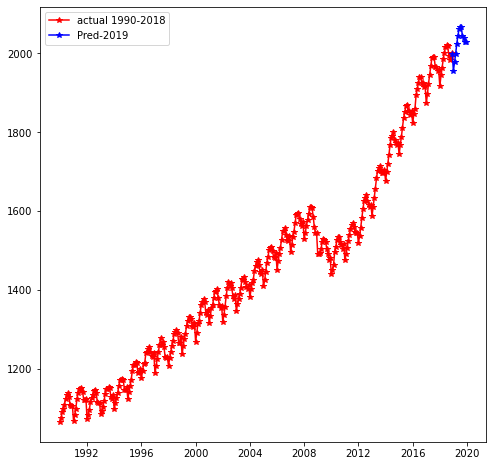

In [215]:
plt.figure( figsize=  ( 8 , 8)) , 
plt.plot(  hp ,                     color = 'r'   , marker = '*' , label = 'actual 1990-2018')
plt.plot(pred_after_anti_log ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

In [216]:
pred_actual = pd.DataFrame()

pred_actual['Predicted']  =    pred_after_anti_log
pred_actual['Actual']     =    np.exp(test)

pred_actual['Error']      =    pred_actual['Actual']  - pred_actual['Predicted']

pred_actual['Per_error']  =    np.round(pred_actual.Error  * 100/ pred_actual.Actual)

pred_actual

,Predicted,Actual,Error,Per_error
2018-12-01,1998.0,2000.2,2.2,0.0
2019-01-01,1956.0,NaN,NaN,NaN
2019-02-01,1978.0,NaN,NaN,NaN
2019-03-01,1998.0,NaN,NaN,NaN
2019-04-01,2024.0,NaN,NaN,NaN
2019-05-01,2044.0,NaN,NaN,NaN
2019-06-01,2062.0,NaN,NaN,NaN
2019-07-01,2068.0,NaN,NaN,NaN
2019-08-01,2068.0,NaN,NaN,NaN
2019-09-01,2044.0,NaN,NaN,NaN


In [ ]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    p_value = adfuller(series)[1]
    if p_value < .05:
        print("p_value is ----->", p_value)
        print("REject the null hypothesis")
        print("Series is STATIONARY")
    else:
        print("P_value is ---->", p_value)
        print("Fail to reject the null hypothesis")
        print("Series is not Stationary")

In [275]:
adf_test_normality(wr)

P_value is ----> 1.0
Fail to reject the null hypothesis
Series is not Stationary


In [385]:
########################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [386]:
pc = pd.read_csv(r"C:\Users\ganes\Dropbox\PC\Downloads\price_of_ground_chuck.csv")

In [387]:
pc

,Month,Price
0,2/1/99,1.862
1,3/1/99,1.834
2,4/1/99,1.833
3,5/1/99,1.812
4,6/1/99,1.815
5,7/1/99,1.810
6,8/1/99,1.826
7,9/1/99,1.852
8,10/1/99,1.866
9,11/1/99,1.863


In [388]:
pc.head()

,Month,Price
0,2/1/99,1.862
1,3/1/99,1.834
2,4/1/99,1.833
3,5/1/99,1.812
4,6/1/99,1.815


In [337]:
pc.columns

Index(['Month', 'Price'], dtype='object')

In [338]:
##aim is to do forecast for next 10 months i.e 2020

In [339]:
pc.Month = pd.to_datetime(pc.Month , infer_datetime_format= True)

In [340]:
pc = pc.set_index(['Month'])

In [341]:
pc

,Price
Month,
1999-02-01,1.862
1999-03-01,1.834
1999-04-01,1.833
1999-05-01,1.812
1999-06-01,1.815
1999-07-01,1.810
1999-08-01,1.826
1999-09-01,1.852
1999-10-01,1.866


In [342]:
pc.columns

Index(['Price'], dtype='object')

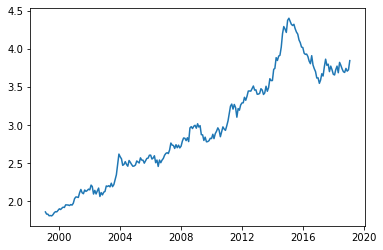

In [343]:
plt.plot(pc);

In [344]:
pc.diff()

,Price
Month,
1999-02-01,NaN
1999-03-01,-0.028
1999-04-01,-0.001
1999-05-01,-0.021
1999-06-01,0.003
1999-07-01,-0.005
1999-08-01,0.016
1999-09-01,0.026
1999-10-01,0.014


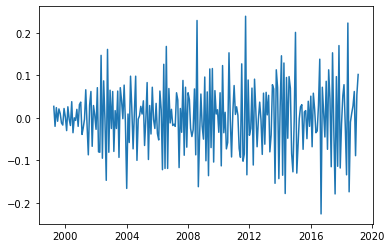

In [345]:
plt.plot(pc.diff().diff());

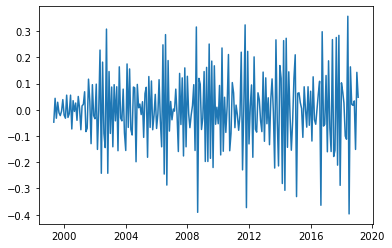

In [346]:
plt.plot(pc.diff().diff().diff());

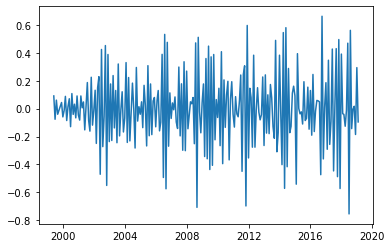

In [347]:
plt.plot(pc.diff().diff().diff().diff());

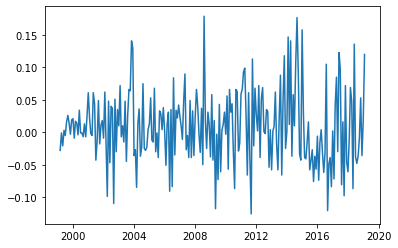

In [348]:
plt.plot(pc.diff());

In [349]:
log_pc = np.log(pc)

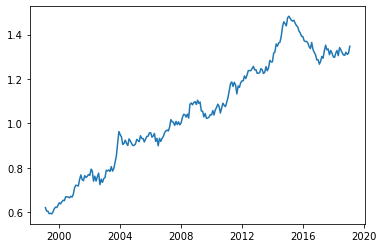

In [350]:
plt.plot(log_pc);

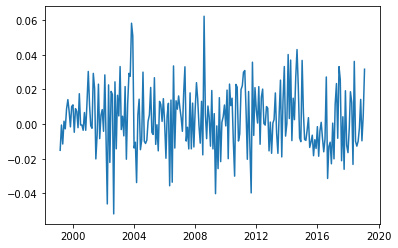

In [351]:
plt.plot(log_pc.diff());

In [352]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

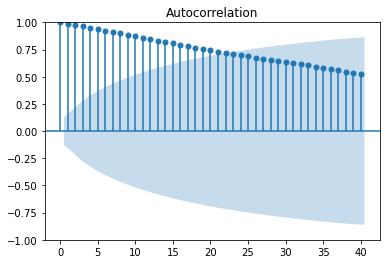

In [353]:
plot_acf(log_pc.Price, lags = 40);

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


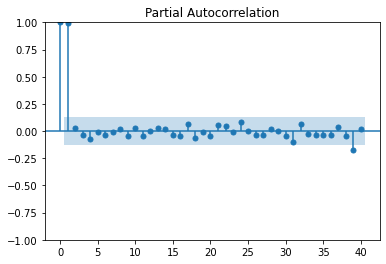

In [354]:
plot_pacf(log_pc.Price, lags = 40);

In [355]:
import pmdarima

from pmdarima import  auto_arima

In [356]:
auto_arima(log_pc , seasonal= True  , m = 10)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 10),
      suppress_warnings=True)

In [357]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [358]:
model_sarima6 = SARIMAX(log_pc , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

# object 

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [359]:
results6 = model_sarima6.fit() 


C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [360]:
pred5 = results6.predict(start= 240 ,  end = 250)
# predition for next one year 

In [361]:
pred_after_anti_log = np.round(np.exp(pred5))


In [362]:
pred_after_anti_log

2019-02-01    4.0
2019-03-01    4.0
2019-04-01    4.0
2019-05-01    4.0
2019-06-01    4.0
2019-07-01    4.0
2019-08-01    4.0
2019-09-01    4.0
2019-10-01    4.0
2019-11-01    4.0
2019-12-01    4.0
Freq: MS, Name: predicted_mean, dtype: float64

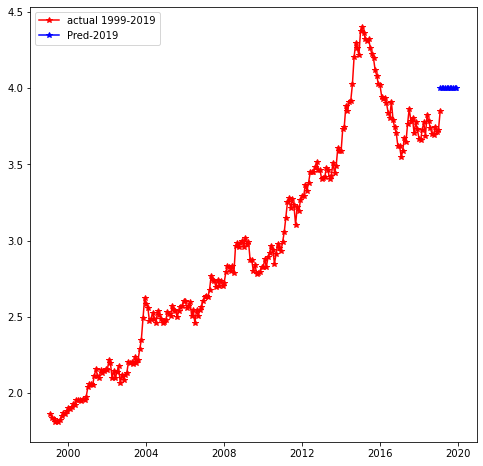

In [363]:
plt.figure( figsize=  ( 8 , 8)) , 
plt.plot(pc  ,                color = 'r'   , marker = '*' , label = 'actual 1999-2019')
plt.plot(pred_after_anti_log  ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

#year on year its in uptrend and with a year its seasonal

In [364]:
train   = log_pc.iloc[ 0 :226 , ]   #  1st 11 years in train
test    = log_pc.iloc[226:241 , ]   #  last 1 year in test

In [365]:
auto_arima(log_pc , seasonal= True  , m = 12)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [366]:
model_sarima7 = SARIMAX(train , order = (2, 0, 0)  ,seasonal_order=(0, 1, 1, 12))

C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ganes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [367]:
results7 = model_sarima7.fit()

In [368]:
pred_after_anti_log_2019 =round(np.exp(results7.predict(start = 240 , end = 250)))

In [369]:
pred_after_anti_log_2019 

2019-02-01    4.0
2019-03-01    4.0
2019-04-01    4.0
2019-05-01    4.0
2019-06-01    4.0
2019-07-01    4.0
2019-08-01    4.0
2019-09-01    4.0
2019-10-01    4.0
2019-11-01    4.0
2019-12-01    4.0
Freq: MS, Name: predicted_mean, dtype: float64

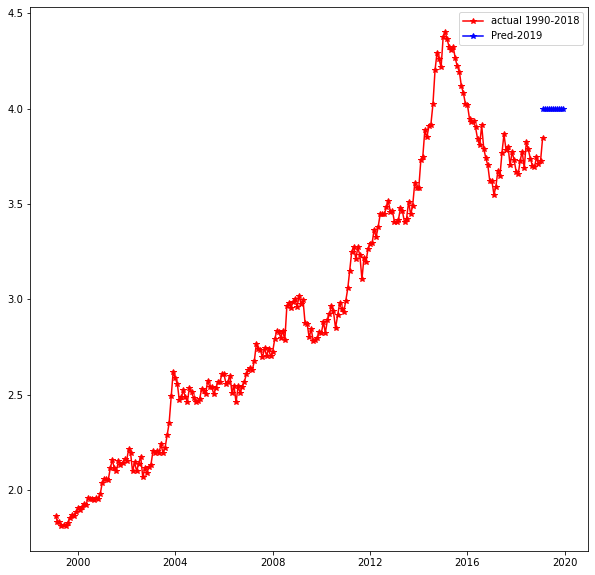

In [377]:
plt.figure( figsize=  ( 10 , 10)) , 
plt.plot(pc   ,                     color = 'r'   , marker = '*' , label = 'actual 1990-2018')
plt.plot(pred_after_anti_log_2019  ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

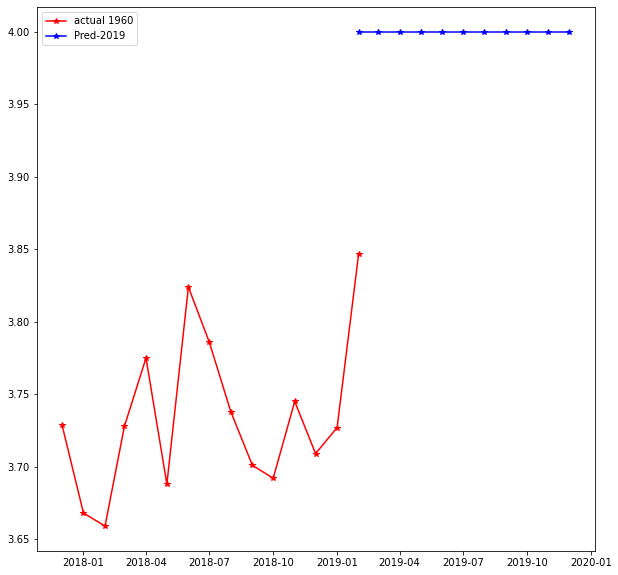

In [378]:
plt.figure( figsize=  ( 10 , 10)) 
plt.plot(pc.iloc[226:250]   ,       color = 'r'   , marker = '*' , label = 'actual 1960')
plt.plot(pred_after_anti_log_2019  ,    color = 'b'   , marker = '*' , label = 'Pred-2019')
plt.legend();

In [379]:
pred_actual = pd.DataFrame()

pred_actual['Predicted']  =    pred_after_anti_log_2019
pred_actual['Actual']     =    np.exp(test)

pred_actual['Error']      =    pred_actual['Actual']  - pred_actual['Predicted']

pred_actual['Per_error']  =    np.round(pred_actual.Error  * 100/ pred_actual.Actual)

pred_actual

,Predicted,Actual,Error,Per_error
2019-02-01,4.0,3.847,-0.153,-4.0
2019-03-01,4.0,NaN,NaN,NaN
2019-04-01,4.0,NaN,NaN,NaN
2019-05-01,4.0,NaN,NaN,NaN
2019-06-01,4.0,NaN,NaN,NaN
2019-07-01,4.0,NaN,NaN,NaN
2019-08-01,4.0,NaN,NaN,NaN
2019-09-01,4.0,NaN,NaN,NaN
2019-10-01,4.0,NaN,NaN,NaN
2019-11-01,4.0,NaN,NaN,NaN


In [380]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    p_value = adfuller(series)[1]
    if p_value < .05:
        print("p_value is ----->", p_value)
        print("REject the null hypothesis")
        print("Series is STATIONARY")
    else:
        print("P_value is ---->", p_value)
        print("Fail to reject the null hypothesis")
        print("Series is not Stationary")

In [374]:
adf_test_normality(pc)

P_value is ----> 0.7796816368042083
Fail to reject the null hypothesis
Series is not Stationary
